In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:

# Paths to dataset directories
train_dir = "/kaggle/input/facial-data/train"
test_dir = "/kaggle/input/facial-data/test"

In [3]:
# Image parameters
img_height, img_width = 48, 48
batch_size = 64

# Data generators
datagen = ImageDataGenerator(rescale=1.0 / 255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Load the existing model
model = load_model("/kaggle/input/emotion_recognition/tensorflow2/default/1/emotion_recognition_model.h5")

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733131913.359523     121 service.cc:145] XLA service 0x7ed4e80057f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733131913.359585     121 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/359 ━━━━━━━━━━━━━━━━━━━━ 56:18 9s/step - accuracy: 0.4531 - loss: 4.4964

I0000 00:00:1733131919.408815     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


359/359 ━━━━━━━━━━━━━━━━━━━━ 116s 297ms/step - accuracy: 0.5030 - loss: 1.4869 - val_accuracy: 0.8075 - val_loss: 0.6062
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.7134 - loss: 0.7716 - val_accuracy: 0.8579 - val_loss: 0.4779
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.7626 - loss: 0.6481 - val_accuracy: 0.8664 - val_loss: 0.4337
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.7899 - loss: 0.5815 - val_accuracy: 0.8789 - val_loss: 0.4048
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.8003 - loss: 0.5458 - val_accuracy: 0.8636 - val_loss: 0.4152
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.8095 - loss: 0.5274 - val_accuracy: 0.8706 - val_loss: 0.4106
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8187 - loss: 0.4979 - val_accuracy: 0.8659 - val_loss: 0.4250
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.8305 - loss: 0.4677 - val_accur

In [5]:
# Save the retrained model
model.save("retrained_emotion_recognition_model.h5")
print("Model saved to retrained_emotion_recognition_model.h5")

Model saved to retrained_emotion_recognition_model.h5


In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 35s 313ms/step - accuracy: 0.5834 - loss: 1.5051
Test Accuracy: 62.86%


In [7]:
# Generate predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step


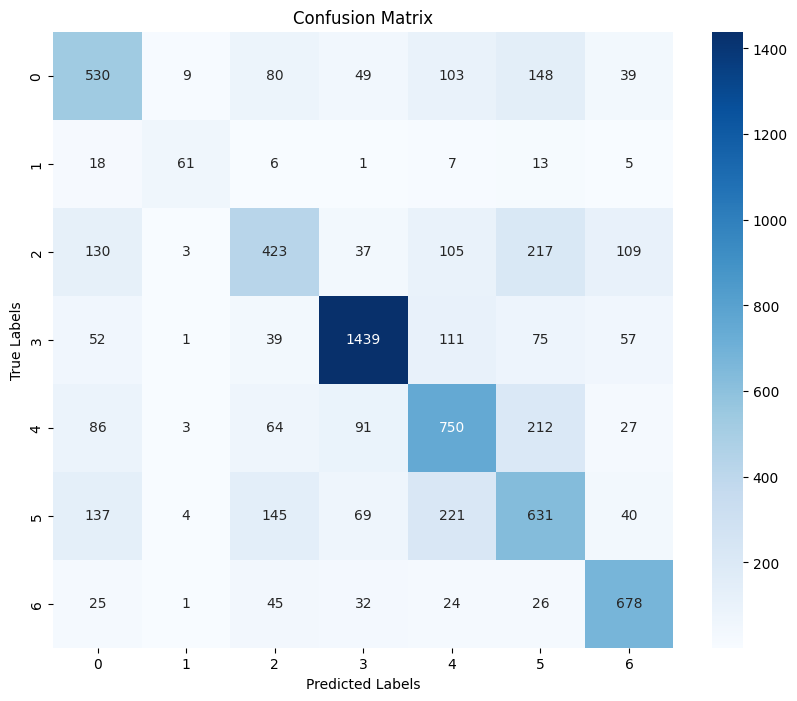

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [9]:
# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       958
           1       0.74      0.55      0.63       111
           2       0.53      0.41      0.46      1024
           3       0.84      0.81      0.82      1774
           4       0.57      0.61      0.59      1233
           5       0.48      0.51      0.49      1247
           6       0.71      0.82      0.76       831

    accuracy                           0.63      7178
   macro avg       0.63      0.61      0.61      7178
weighted avg       0.63      0.63      0.63      7178



In [10]:
# Accuracy Score
overall_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

Overall Accuracy: 62.86%


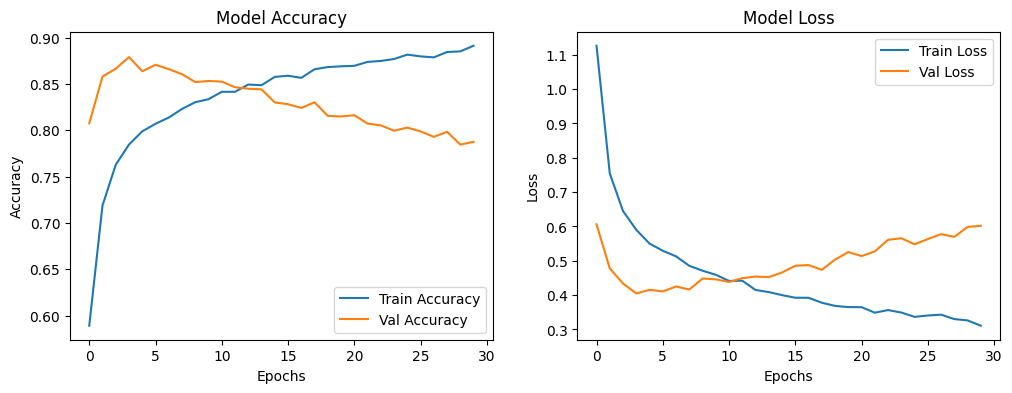

In [11]:
# Plot training history
def plot_metrics(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    # Accuracy
    ax[0].plot(history.history["accuracy"], label="Train Accuracy")
    ax[0].plot(history.history["val_accuracy"], label="Val Accuracy")
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()
    # Loss
    ax[1].plot(history.history["loss"], label="Train Loss")
    ax[1].plot(history.history["val_loss"], label="Val Loss")
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()
    plt.show()

plot_metrics(history)
